# Heart Disease -Machine Learning
## Dataset from Kaggle
#### Link : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,roc_auc_score,roc_curve,auc,precision_score,recall_score,f1_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Visualizing Data-Elements

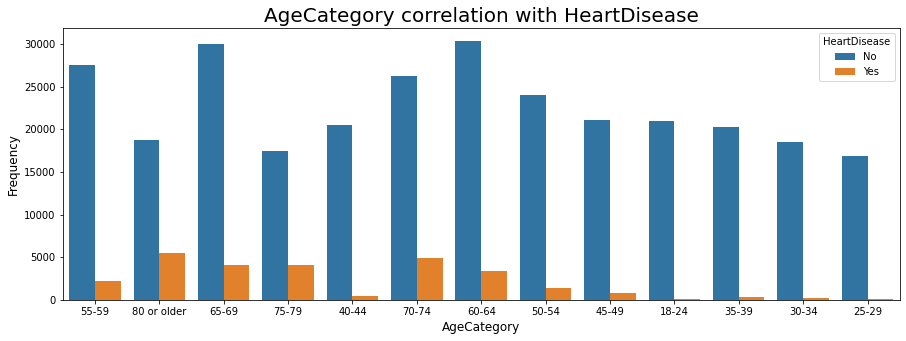

In [6]:
plt.figure(figsize = (15,5))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df)
plt.title("AgeCategory correlation with HeartDisease",size=20)
plt.xlabel('AgeCategory',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

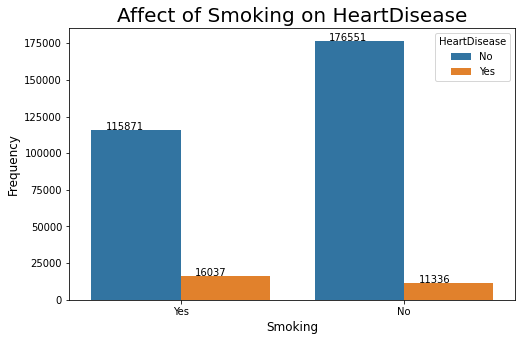

In [7]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'Smoking', hue = 'HeartDisease', data = df)
plt.title("Affect of Smoking on HeartDisease",size=20)
plt.xlabel("Smoking",size=12)
plt.ylabel("Frequency",size=12)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.065, p.get_height()))

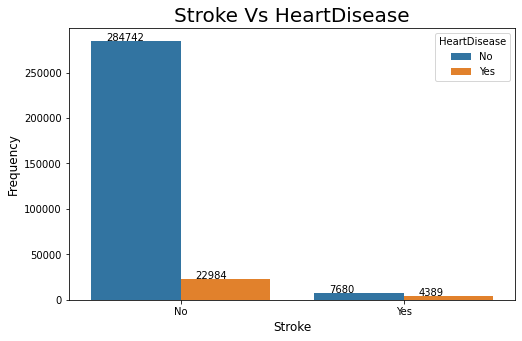

In [8]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'Stroke', hue = 'HeartDisease', data = df)
plt.title("Stroke Vs HeartDisease",size=20)
plt.xlabel("Stroke",size=12)
plt.ylabel("Frequency",size=12)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.065, p.get_height()))

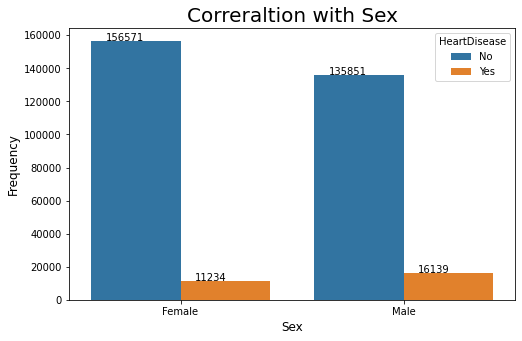

In [9]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'Sex', hue = 'HeartDisease', data = df)
plt.title("Correraltion with Sex",size=20)
plt.xlabel("Sex",size=12)
plt.ylabel("Frequency",size=12)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.065, p.get_height()))

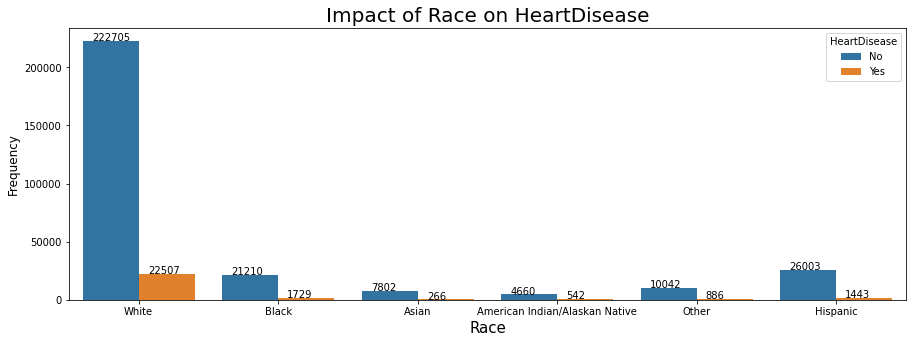

In [10]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x = 'Race', hue = 'HeartDisease', data = df,)
plt.title("Impact of Race on HeartDisease",size=20)
plt.xlabel("Race",size=15)
plt.ylabel("Frequency",size=12)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.065, p.get_height()))

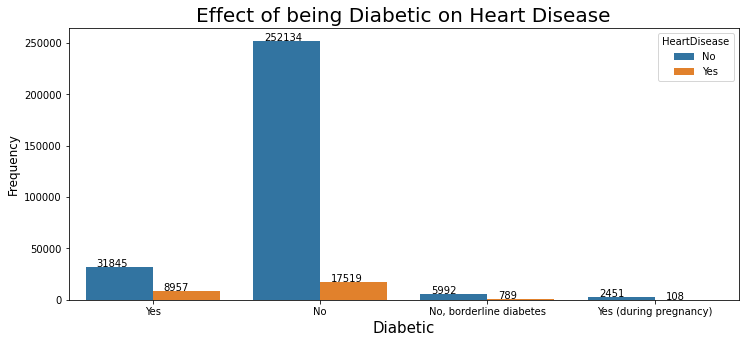

In [11]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'Diabetic', hue = 'HeartDisease', data = df)
plt.title("Effect of being Diabetic on Heart Disease",size=20)
plt.xlabel("Diabetic",size=15)
plt.ylabel("Frequency",size=12)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.065, p.get_height()))

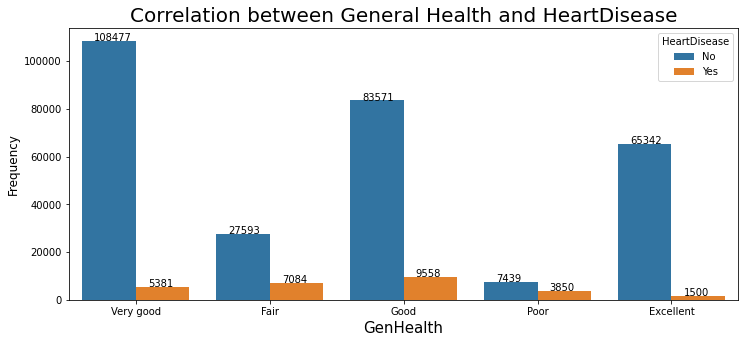

In [12]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'GenHealth', hue = 'HeartDisease', data = df)
plt.title("Correlation between General Health and HeartDisease", size =20)
plt.xlabel("GenHealth",size=15)
plt.ylabel("Frequency",size = 12)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.09, p.get_height()))

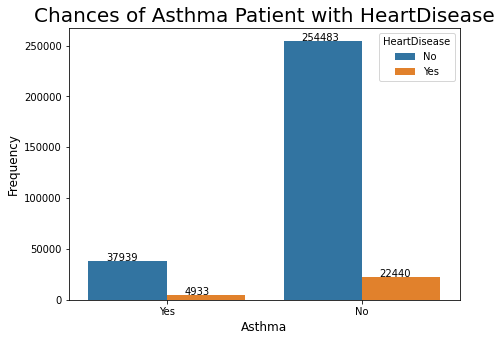

In [13]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'Asthma', hue = 'HeartDisease', data = df)
plt.title("Chances of Asthma Patient with HeartDisease", size =20)
plt.xlabel("Asthma",size=12)
plt.ylabel("Frequency",size = 12)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.09, p.get_height()))

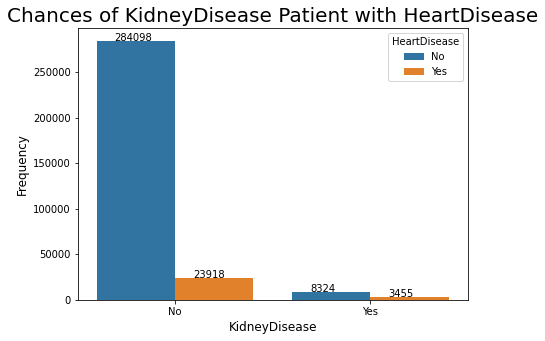

In [14]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'KidneyDisease', hue = 'HeartDisease', data = df)
plt.title("Chances of KidneyDisease Patient with HeartDisease", size =20)
plt.xlabel("KidneyDisease",size=12)
plt.ylabel("Frequency",size = 12)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.09, p.get_height()))

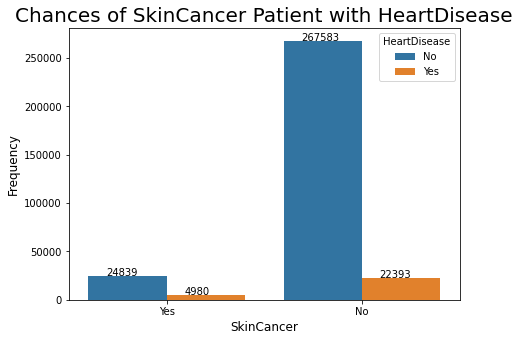

In [15]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'SkinCancer', hue = 'HeartDisease', data = df)
plt.title("Chances of SkinCancer Patient with HeartDisease", size =20)
plt.xlabel("SkinCancer",size=12)
plt.ylabel("Frequency",size = 12)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.09, p.get_height()))

In [16]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<AxesSubplot:xlabel='BMI'>

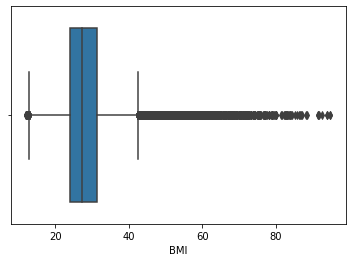

In [17]:
sns.boxplot(x='BMI',data=df)

In [18]:
df[df['BMI']>50]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
105,No,58.54,No,No,No,30.0,0.0,Yes,Male,65-69,Other,"No, borderline diabetes",Yes,Poor,3.0,Yes,No,No
254,No,53.09,No,No,No,30.0,30.0,Yes,Female,55-59,White,Yes,No,Poor,7.0,No,No,No
277,No,51.65,No,No,No,0.0,0.0,No,Female,65-69,White,No,No,Good,8.0,No,No,Yes
504,No,54.87,No,No,No,15.0,15.0,Yes,Female,70-74,White,No,No,Poor,4.0,No,No,Yes
551,No,55.98,No,No,No,15.0,0.0,Yes,Female,80 or older,White,Yes,No,Fair,7.0,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319543,No,51.21,No,No,No,10.0,0.0,No,Female,30-34,Hispanic,No,Yes,Good,7.0,Yes,No,No
319586,No,51.37,No,No,No,0.0,0.0,No,Female,55-59,Hispanic,No,No,Good,7.0,No,No,No
319590,No,62.42,No,No,No,0.0,0.0,Yes,Male,40-44,Hispanic,No,No,Good,7.0,No,No,No
319709,No,51.46,Yes,No,No,30.0,0.0,No,Male,55-59,Hispanic,No,Yes,Good,7.0,Yes,No,No


# Preprocessing Data

In [19]:
x = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']
y.value_counts()
X = pd.get_dummies(x)
Y = np.array(pd.get_dummies(y)['Yes'])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scalerbmi = MinMaxScaler()
scalerphy = MinMaxScaler()
scalermh = MinMaxScaler()
scalerst = MinMaxScaler()

In [21]:
X['BMI'] = scalerbmi.fit_transform(X[['BMI']])
X['PhysicalHealth'] = scalerphy.fit_transform(X[['PhysicalHealth']])
X['MentalHealth'] = scalermh.fit_transform(X[['MentalHealth']])
X['SleepTime'] = scalerst.fit_transform(X[['SleepTime']])

### Correlation with Continous Dependent Variables

In [22]:
correlation = df[['HeartDisease','BMI','PhysicalHealth','MentalHealth','SleepTime']].corr()
correlation

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


### Dependent and Independent Variables

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=31)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(pd.DataFrame(y_test).value_counts())

(255836, 50)
(63959, 50)
(255836,)
0    58472
1     5487
dtype: int64


In [24]:
n_estimators = 50
models = [LogisticRegression(random_state=31,C=1,max_iter=1000,penalty='l2'),
          RandomForestClassifier(n_estimators=n_estimators,random_state=31,max_depth=7,min_samples_leaf=2,min_samples_split=5),
          ExtraTreesClassifier(n_estimators=7,random_state=31,max_depth=9,min_samples_leaf=9),
         ]

model_titles = ["LogisticRegression",
               "RandomForest",
               "ExtraTree",]

Model :LogisticRegression 
 Train_Score :91.595
 Test_Score:91.556


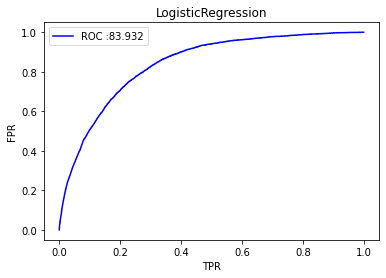

Model :RandomForest 
 Train_Score :91.611
 Test_Score:91.499


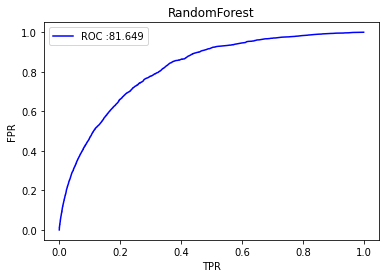

Model :ExtraTree 
 Train_Score :91.655
 Test_Score:91.51


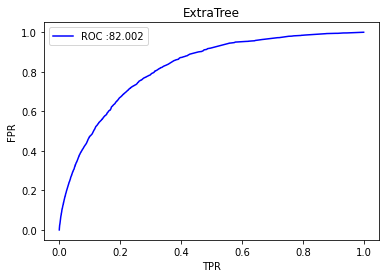

In [25]:
y_agg = []
for i, model in enumerate(models):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    y_predict_proba = model.predict_proba(x_test)[:,1]
    y_agg.append(pd.Series(y_predict_proba))
    tpr,fpr,thres = roc_curve(y_true=y_test,y_score=y_predict_proba)
    auc_score = auc(tpr,fpr)*100
    train_score = round(model.score(x_train,y_train)*100,3)
    test_score = round(model.score(x_test,y_test)*100,3)
    print(f"Model :{model_titles[i]} \n Train_Score :{train_score}\n Test_Score:{test_score}")
    plt.title(model_titles[i])
    plt.plot(tpr,fpr,'b',label='ROC :%.3f'%auc_score)
    plt.legend()
    plt.xlabel("TPR")
    plt.ylabel("FPR")
    plt.show()

### Creating A Combined Model

In [26]:
final_pred = pd.concat(y_agg,axis=1).mean(axis=1)
final_pred[final_pred<0.5]

0        0.147629
1        0.033096
2        0.168757
3        0.101251
4        0.052438
           ...   
63954    0.044186
63955    0.090884
63956    0.218953
63957    0.021527
63958    0.023850
Length: 63455, dtype: float64

array([1.78289939, 0.78289939, 0.68945832, ..., 0.01232613, 0.01232597,
       0.01193424])

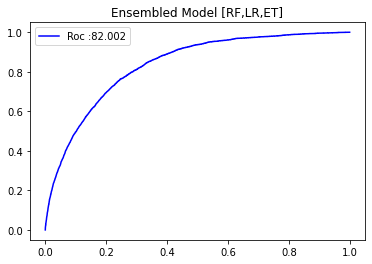

In [27]:
fpr,tpr,threshold = roc_curve(y_test,final_pred)
plt.title("Ensembled Model [RF,LR,ET]")
plt.plot(fpr,tpr,'b',label='Roc :%.3f'%auc_score)
plt.legend()
threshold

In [28]:
acc,prec,recall,f1,roc = [[] for i in range(5)]

In [29]:
y_pred = [1 if i > 0.5 else 0 for i in final_pred]
y_pred.count(0)

63455

In [30]:
for i in threshold:
    y_pred = np.where(final_pred > i, 1, 0)
    acc.append(accuracy_score(y_test,y_pred)*100)
    f1.append(f1_score(y_test,y_pred)*100)

In [31]:
scores = pd.concat([pd.Series(threshold),pd.Series(acc),pd.Series(f1)],axis=1)
scores.columns = ['Threshold','Accuracy_Score','F1_Score']

In [32]:
scores

,Threshold,Accuracy_Score,F1_Score
0,1.782899,91.421067,0.000000
1,0.782899,91.421067,0.000000
2,0.689458,91.452337,0.726348
3,0.684789,91.453900,0.762527
4,0.678679,91.458591,0.906947
...,...,...,...
10179,0.012347,8.666489,15.814959
10180,0.012347,8.664926,15.814731
10181,0.012326,8.646164,15.811997
10182,0.012326,8.644600,15.811769


In [33]:
scores.sort_values(by='Accuracy_Score',ascending=False)

,Threshold,Accuracy_Score,F1_Score
431,0.447357,91.557091,14.853359
432,0.447172,91.555528,14.851017
430,0.447413,91.555528,14.824160
436,0.446329,91.555528,14.958274
293,0.487698,91.553964,10.975610
...,...,...,...
10179,0.012347,8.666489,15.814959
10180,0.012347,8.664926,15.814731
10181,0.012326,8.646164,15.811997
10182,0.012326,8.644600,15.811769


In [34]:
y_org_pred = np.where(final_pred>0.179076,1,0)
print(accuracy_score(y_test,y_org_pred))

0.8717146922247064


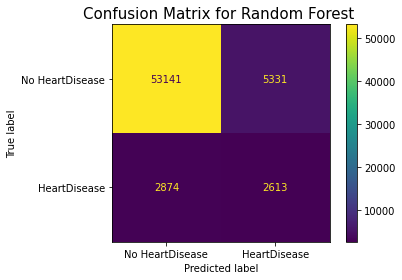

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_org_pred),display_labels=['No HeartDisease','HeartDisease']).plot()
plt.title("Confusion Matrix for Random Forest ",size=15)
plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

2022-07-14 17:23:59.671870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-14 17:23:59.671889: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [37]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[x_train.shape[1],],kernel_initializer='uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


2022-07-14 17:24:02.094842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 17:24:02.095003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-14 17:24:02.095044: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-14 17:24:02.095080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-14 17:24:02.095116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [38]:
print(x_train.shape)
print(y_train.shape)

(255836, 50)
(255836,)


In [39]:
new_x = np.array(x_train)
new_y = np.array(y_train)
print(x.columns)

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')


In [40]:
result = model.fit(new_x,new_y,epochs=5,batch_size=512,validation_data=[x_test,y_test])
model.evaluate(x_test,y_test)

Epoch 1/5
500/500 [==============================] - 1s 2ms/step - loss: 0.2577 - accuracy: 0.9137 - val_loss: 0.2276 - val_accuracy: 0.9156
Epoch 2/5
500/500 [==============================] - 1s 1ms/step - loss: 0.2274 - accuracy: 0.9161 - val_loss: 0.2271 - val_accuracy: 0.9156
Epoch 3/5
500/500 [==============================] - 1s 1ms/step - loss: 0.2269 - accuracy: 0.9163 - val_loss: 0.2273 - val_accuracy: 0.9155
Epoch 4/5
500/500 [==============================] - 1s 1ms/step - loss: 0.2266 - accuracy: 0.9164 - val_loss: 0.2276 - val_accuracy: 0.9156
Epoch 5/5
1999/1999 [==============================] - 1s 492us/step - loss: 0.2262 - accuracy: 0.9154


[0.22619929909706116, 0.9153989553451538]

In [41]:
final_pred = model.predict(x_test,batch_size=512)[:,0]
y_org_pred = np.where(final_pred>0.5,1,0)
print(accuracy_score(y_test,y_org_pred))

125/125 [==============================] - 0s 561us/step
0.9153989274378899


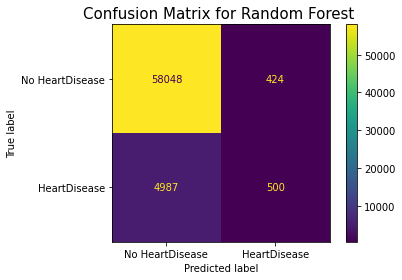

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_org_pred),display_labels=['No HeartDisease','HeartDisease']).plot()
plt.title("Confusion Matrix for Random Forest ",size=15)
plt.show()

In [43]:
import pickle

In [44]:
pickle.dump(model, open("heart_disease_model.pkl",'wb'))
pickle.dump(scalerbmi, open("bmiscaler.pkl",'wb'))
pickle.dump(scalermh, open("mentalhealthscaler.pkl",'wb'))
pickle.dump(scalerphy, open('physicalactivity.pkl','wb'))
pickle.dump(scalerst, open('sleeptime.pkl','wb'))

INFO:tensorflow:Assets written to: ram://ae39400a-3fba-4612-aef0-8b8cb37700ce/assets
